In [1]:
# import libraries

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv(r'E:\linkdin post project\how to plot subplots easily\bike_sharing.csv') 
bike = bike.drop('Unnamed: 0',axis = 1)
bike.date = pd.to_datetime(bike.date) 
bike.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,jan,yes,mon,no,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,jan,yes,tues,no,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,jan,yes,wed,no,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,jan,yes,thurs,no,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,jan,yes,fri,no,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### about data 
* This dataset contain data about a bike-sharing provider from the year 2018 to 2019 

# Univariate

# Lets say we have to analyse the categorical columns 


In [3]:
categorical_columns = (bike.select_dtypes(include = ['object']).columns).tolist() 
categorical_columns

['season', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

* as we know for categorical_columns best plots are histplot 
* There is 6 categorical columns so we have to make 6 subplots 


# case 1 
* lets say you want 2 plots in each row

### Normal way

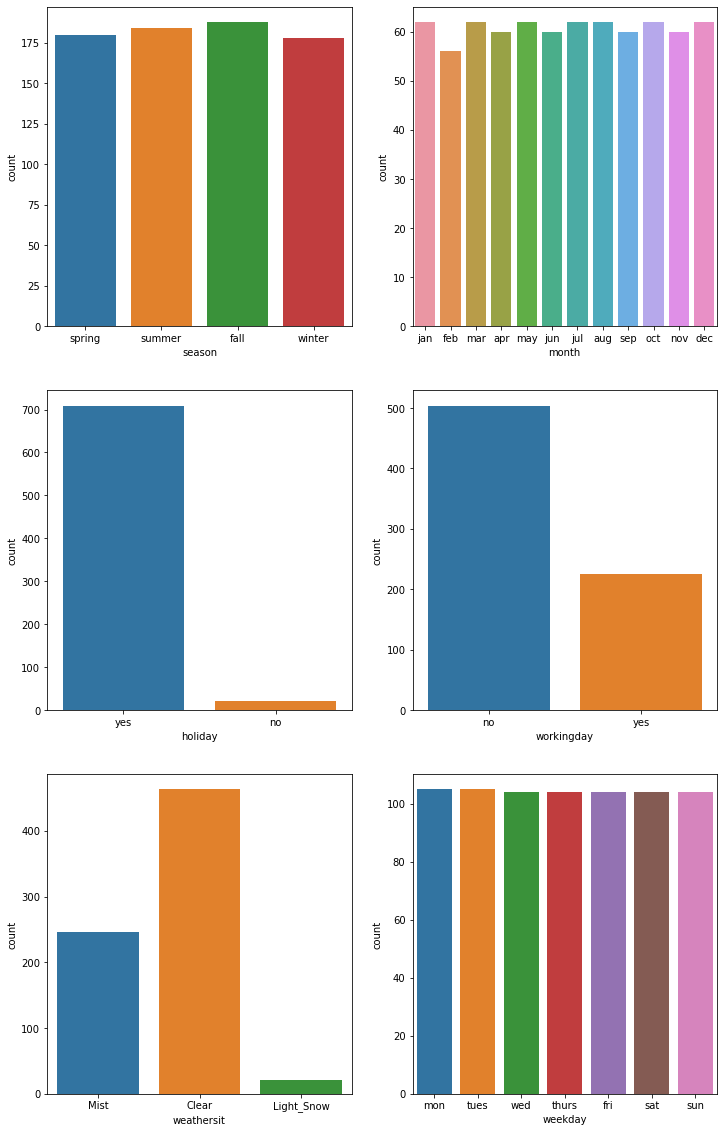

In [4]:
plt.figure(figsize=[12,20]) 
plt.subplot(3,2,1)
sns.countplot(data=bike,x='season') 
plt.subplot(3,2,2)
sns.countplot(data=bike,x='month') 
plt.subplot(3,2,3)
sns.countplot(data=bike,x='holiday') 
plt.subplot(3,2,4)
sns.countplot(data=bike,x='workingday') 
plt.subplot(3,2,5)
sns.countplot(data=bike,x='weathersit') 
plt.subplot(3,2,6)
sns.countplot(data=bike,x='weekday') 
plt.show()


# Efficient way 

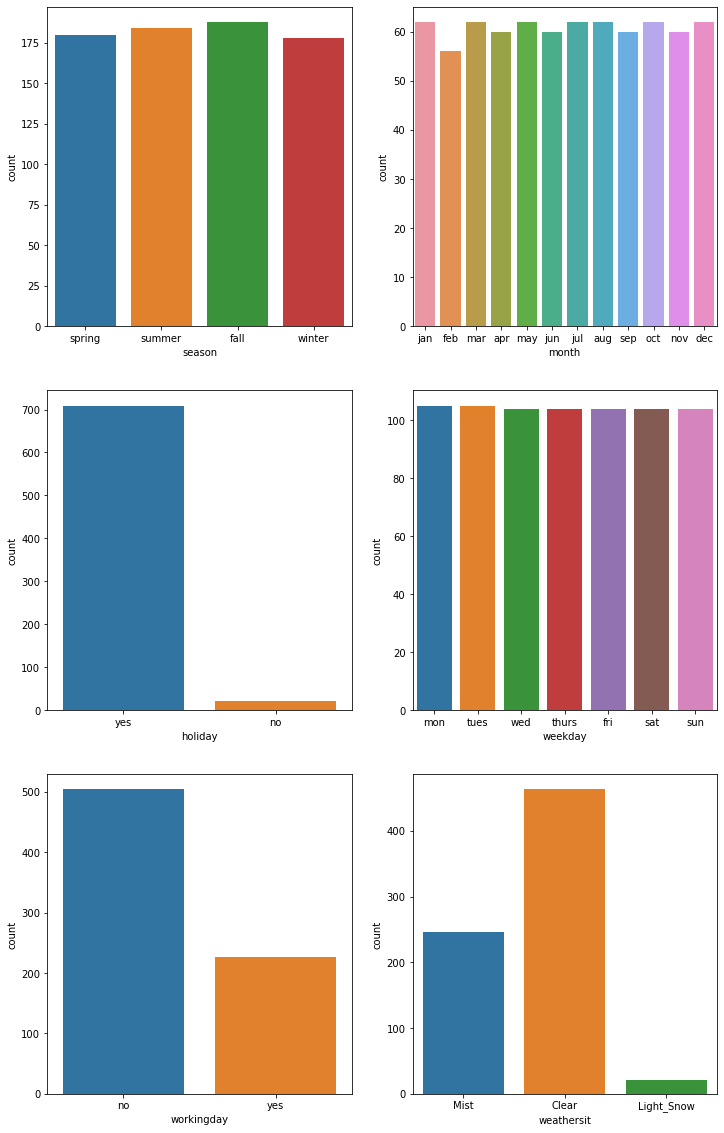

In [5]:
fig, ax = plt.subplots(3,2, figsize = (12,20))
counter=0
for i in categorical_columns:
    trace_x = counter // 2
    trace_y = counter % 2
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=bike) 
    #plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional for adjustment
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation 
    #chart.set(title = f'Barplot for {i}') # optional for title 
    counter += 1
plt.show()

# code 

* step1 :- make a list of those columns names which you want to plot 
* step2 :- predetermine that how many rows and columns you want 
* step3 :- use the below code put rows and columns and what type of plot you want
<code>
fig, ax = plt.subplots(rows,columns, figsize = (12,20)) # set your figure size 
counter=0
for i in categorical_columns:
    trace_x = counter // columns #row number 
    trace_y = counter % columns  #column number 
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=bike) # which type of plot you want
    #plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional for adjustment
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation 
    #chart.set(title = f'') # optional for title
    counter += 1
plt.show()
</code>

##### what happening is its first making subplots grid and then plotting it .

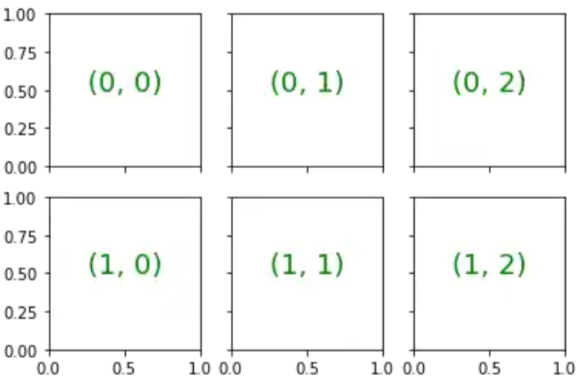

# case 2  
* lets say you want 3 plots in each rows 


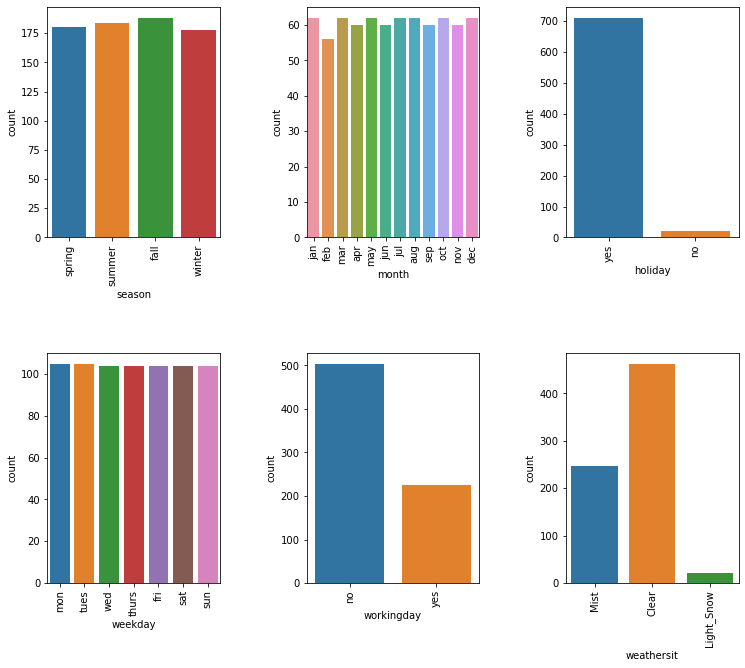

In [6]:
fig, ax = plt.subplots(2,3, figsize = (12,10))
counter=0
for i in categorical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(x=i,ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5) #optional for adjustment
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation
    counter += 1
plt.show()

# case 3 
* lets say you want all 6 plots in one row

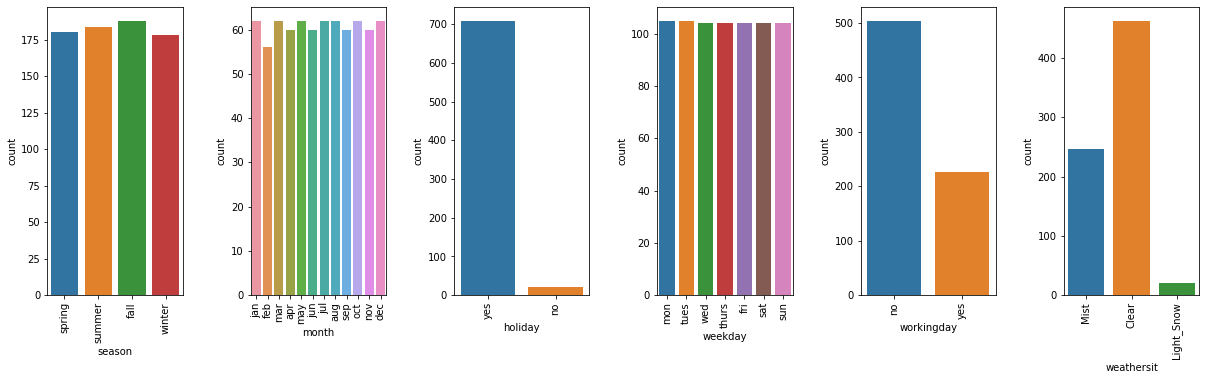

In [7]:
fig, ax = plt.subplots(1,6, figsize = (20,5))
counter=0
for i in categorical_columns:
    trace_x = counter // 6
    trace_y = counter % 6
    chart=sns.countplot(x=i,ax=ax[trace_y],data=bike) # note for 1 row we just give ax=ax[trace_y] 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5) #optional for adjustment
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation
    counter += 1
plt.show()

# Bivariate 

# case4

### Lets say we want to compare each categorical variables with count of rental bikes (cnt)

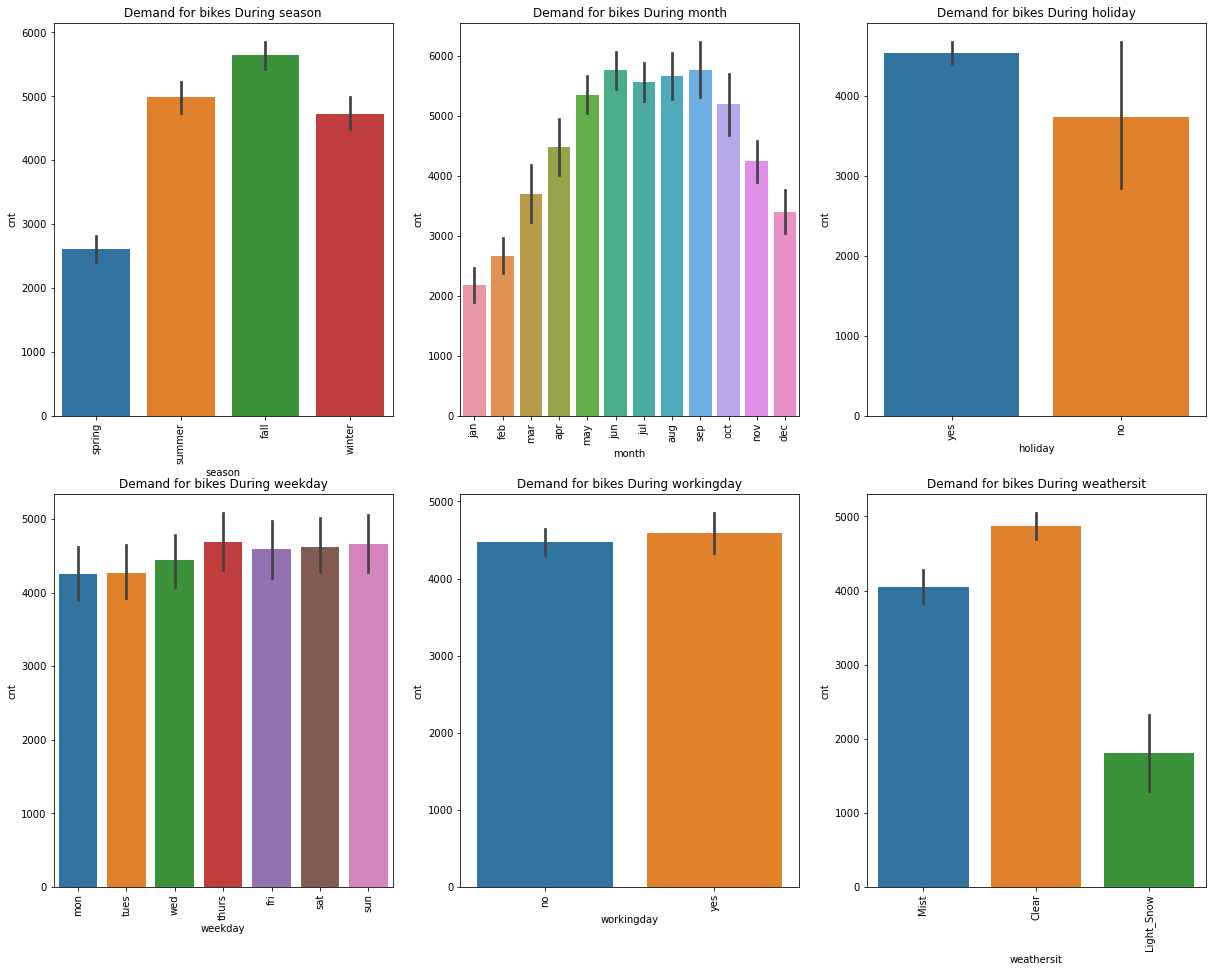

In [8]:
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in categorical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.barplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set(title = f'Demand for bikes During {i}') # optional for giving the title
    counter += 1
plt.show() 

# Case 5 
* lets say you want plot boxplots for each categorical columns 

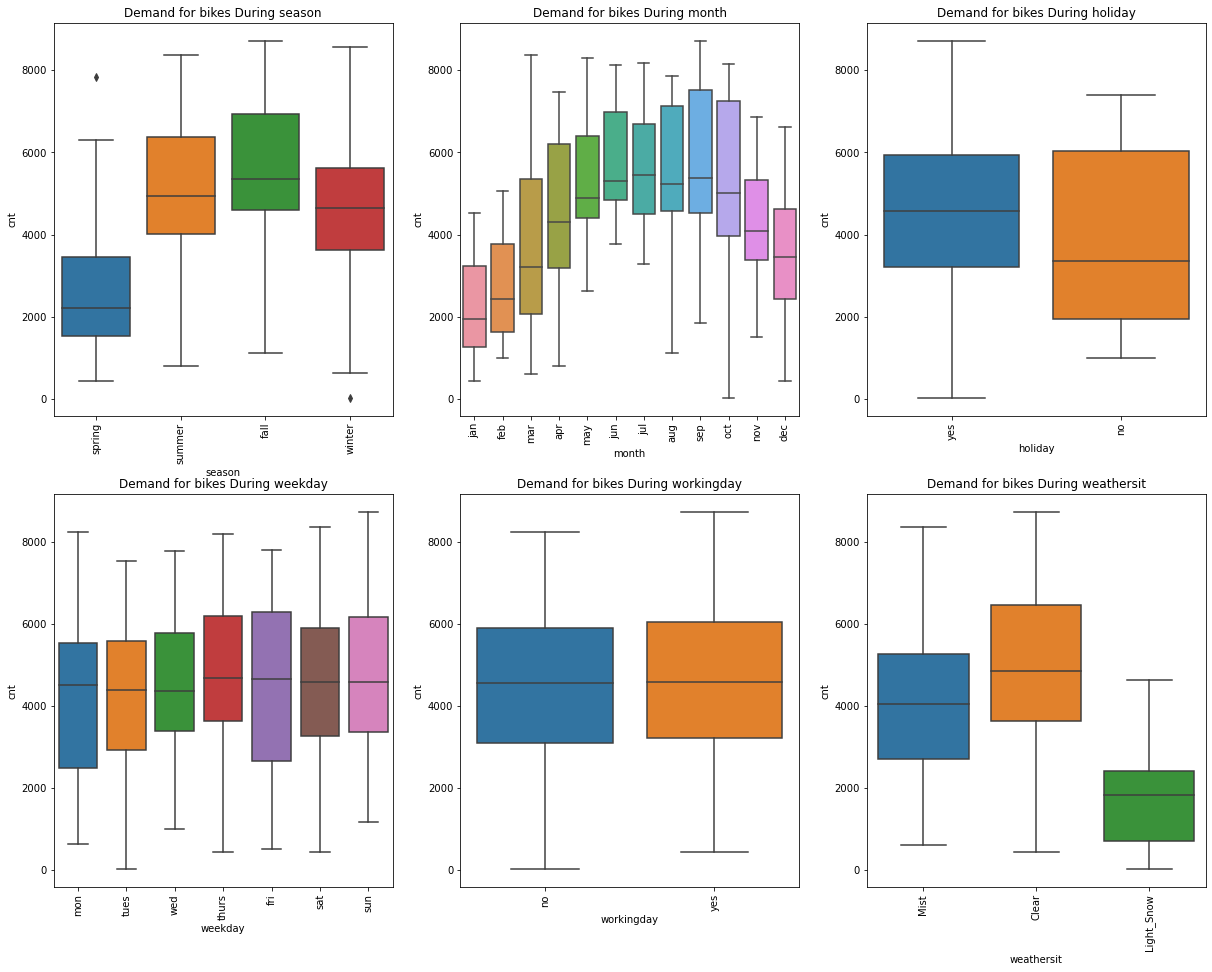

In [9]:
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in categorical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) # boxplot for every columns vs count of rental bike
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional for adjustment
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation
    chart.set(title = f'Demand for bikes During {i}') # optional for giving the title
    counter += 1
plt.show() 


# Lets analyse the numirical columns 

In [10]:
numerical_columns = (bike.select_dtypes(include = ['float','int']).columns).tolist() 
numerical_columns

['year',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'cnt']

# case 6
* so there is total 8 numerical columns 
* lets say you want to plot 2 plots in each row 

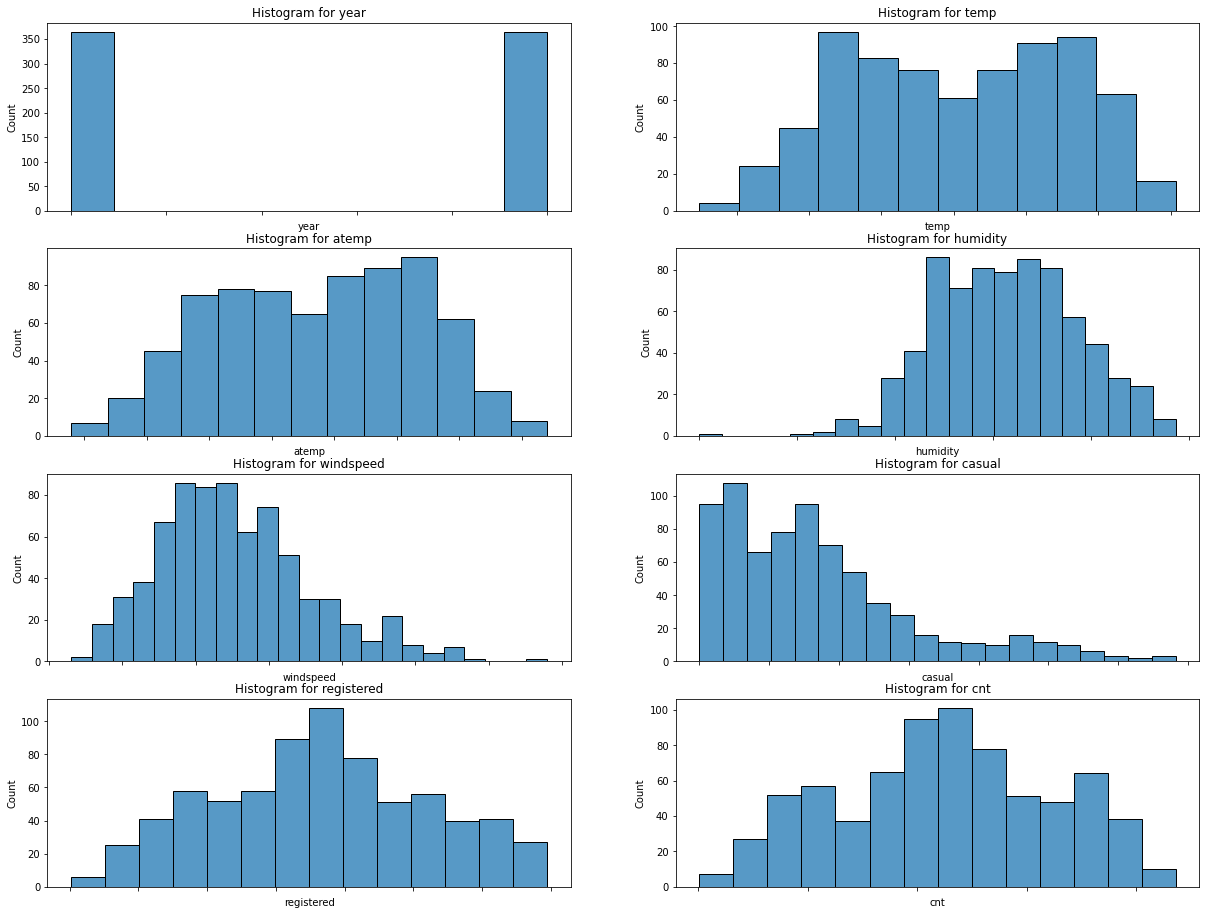

In [11]:
fig, ax = plt.subplots(4,2, figsize = (20,15))
counter=0
for i in numerical_columns:
    trace_x = counter // 2
    trace_y = counter % 2
    chart=sns.histplot(x=i,ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional for adjustment
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation
    chart.set(title = f'Histogram for {i}') # optional
    counter += 1
plt.show() 

# case 7 
* lets say we want scatter plot for each numirical columns with cnt(count of rental bikes)

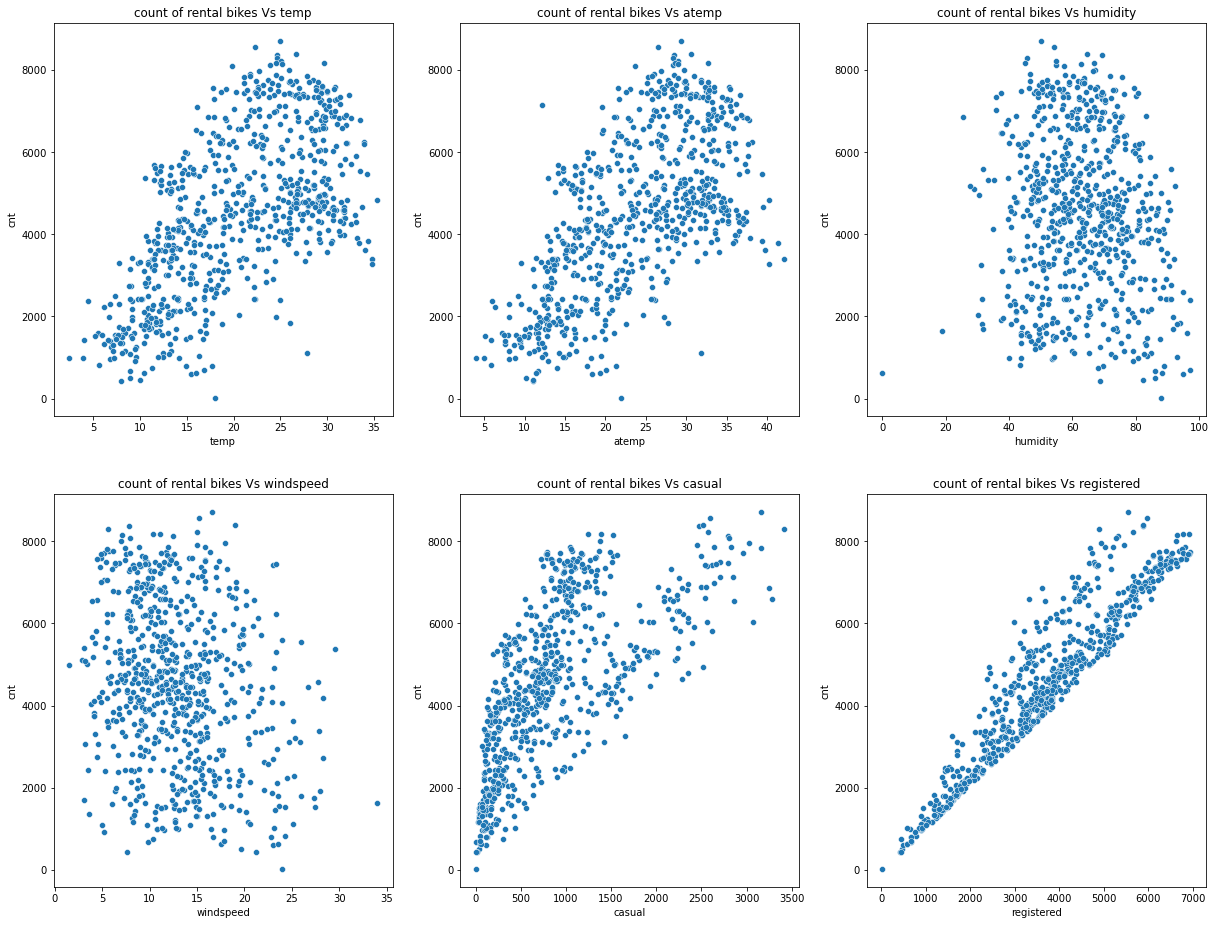

In [12]:
numerical_data_list = ['temp','atemp','humidity','windspeed','casual','registered']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in numerical_data_list:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.scatterplot(x=i,y='cnt',ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    chart.set(title = f'count of rental bikes Vs {i}')
    counter += 1
plt.show()

# case 8
* lets say we want to plot boxplot for each numirical columns for oulier checking 

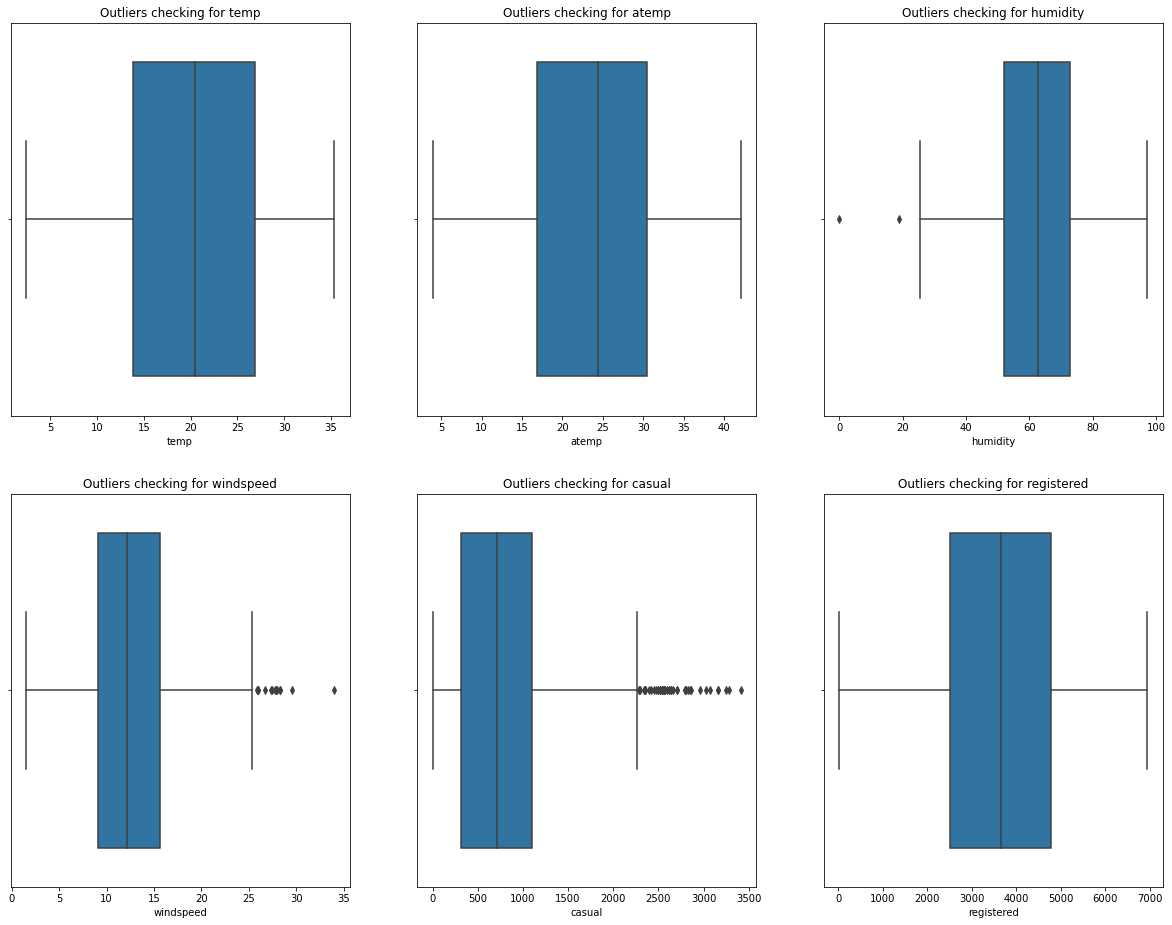

In [13]:
# draw boxplot for numerical columns for checking the outliers 
numerical_columns = ['temp','atemp','humidity','windspeed','casual','registered']
fig, ax = plt.subplots(2,3, figsize = (20,15))
counter=0
for i in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,ax=ax[trace_x, trace_y],data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional
    chart.set(title = f'Outliers checking for {i}') #optional 
    counter += 1
plt.show()

# case 9 
* lets say we want to saw the distribution for each numirical attributes 

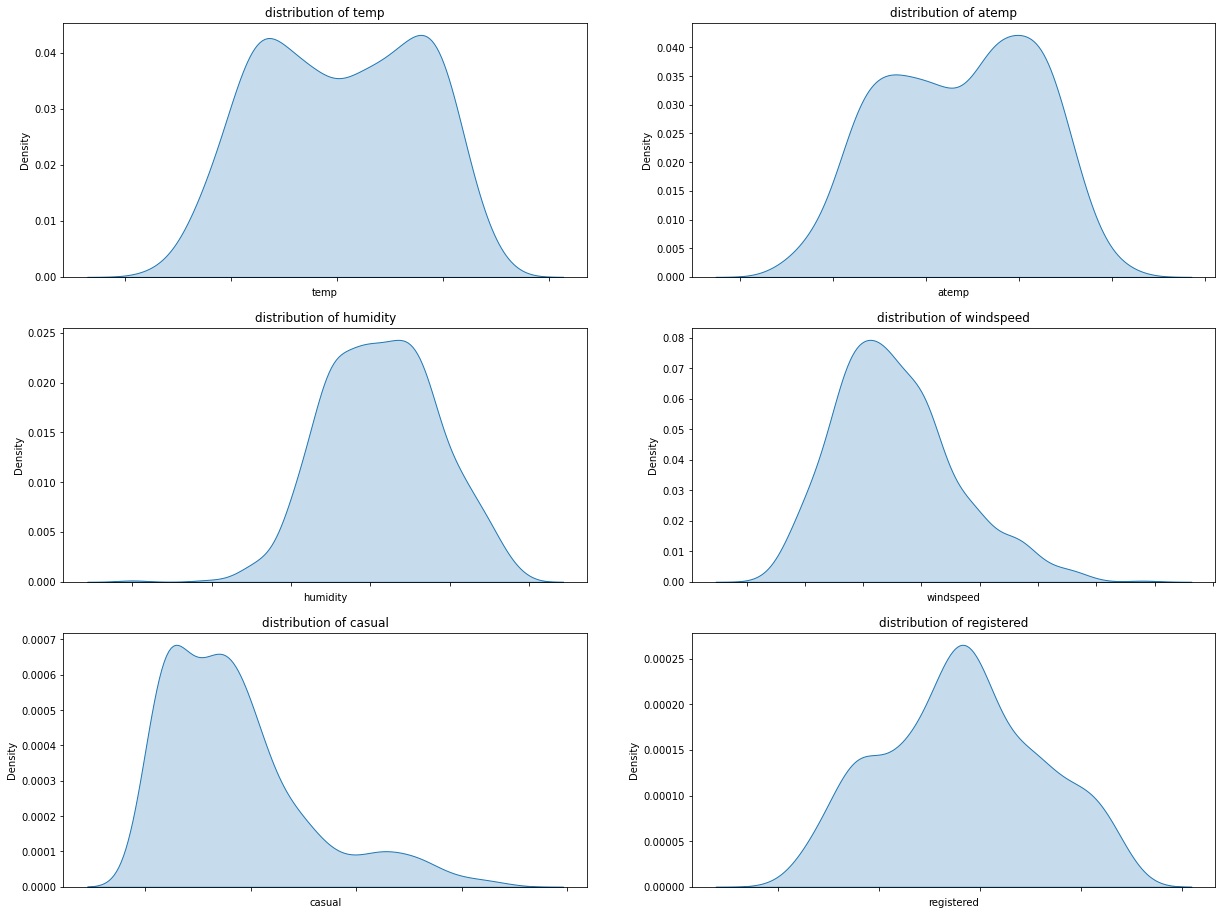

In [14]:
fig, ax = plt.subplots(3,2, figsize = (20,15))
counter=0
for i in numerical_columns:
    trace_x = counter // 2
    trace_y = counter % 2
    chart=sns.kdeplot(x=i,ax=ax[trace_x, trace_y],shade=True,data=bike) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2) #optional for adjustment
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #optional for xticks rotation
    chart.set(title = f'distribution of {i}') # optional
    counter += 1
plt.show() 